In [1]:
import pandas as pd

In [7]:
df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [8]:
### Replacing
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [9]:
df.shape

(891, 2)

In [10]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [11]:
len(df['Cabin'].unique())

148

In [13]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [14]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [15]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [21]:
#prob_df=df.groupby(['Survived'])['Cabin'].mean()

In [18]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [19]:
prob_df

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [22]:
prob_df = pd.DataFrame(prob_df)

In [23]:
prob_df.head()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


In [24]:
prob_df['Died'] = 1-prob_df['Survived']

In [25]:
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [28]:
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [29]:
probability_encoded = prob_df['Probability_ratio'].to_dict()

In [30]:
probability_encoded

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [31]:
df['Cabin_encoded'] = df['Cabin'].map(probability_encoded)

In [32]:
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


In [33]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [34]:
df.isna().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [35]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [36]:
df.isna().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler

In [43]:
Scaler = StandardScaler()
df_scaled=Scaler.fit_transform(df)

In [44]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [46]:
df_scaled.shape

(891, 4)

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 184.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.48632412, -1.40654131, -1.32675851, -1.2469757 ,
        -1.1671929 , -1.08741009, -1.00762729, -0.92784448, -0.84806167,
        -0.76827887, -0.68849606, -0.60871326, -0.52893045, -0.44914765,
        -0.36936484, -0.28958204, -0.20979923, -0.13001642, -0.05023362,
         0.02954919,  0.10933199,  0.1891148 ,  0.2688976 ,  0.34868041,
         0.42846322,  0.50824602,  0.58802883,  0.66781163,  0.74759444,
         0.82737724]),
 <BarContainer object of 30 artists>)

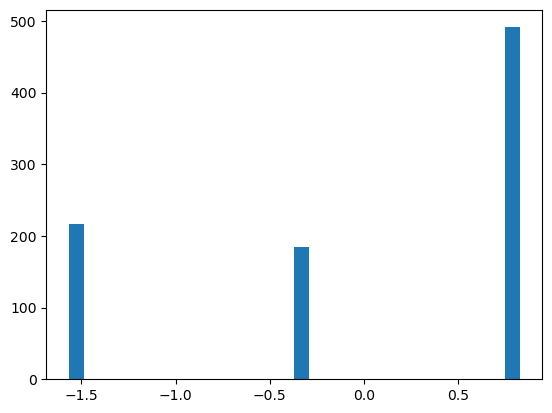

In [51]:
plt.hist(df_scaled[:,1],bins=30)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

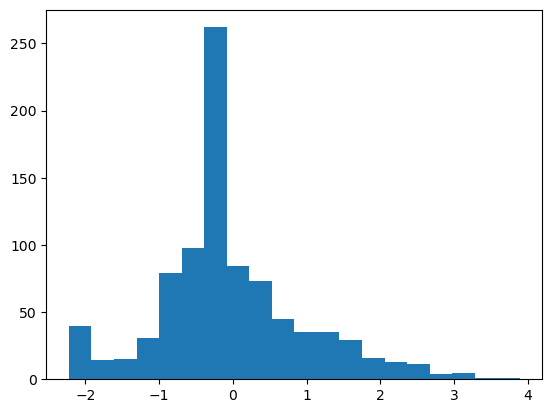

In [52]:
plt.hist(df_scaled[:,2],bins=20)

(array([385., 177., 139.,  31.,  41.,  26.,  31.,   8.,  11.,   4.,   7.,
          9.,   2.,   0.,   0.,   0.,   4.,   5.,   0.,   2.,   6.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.39053195, -0.13264224,  0.12524746,  0.38313716,
         0.64102687,  0.89891657,  1.15680628,  1.41469598,  1.67258569,
         1.93047539,  2.1883651 ,  2.4462548 ,  2.7041445 ,  2.96203421,
         3.21992391,  3.47781362,  3.73570332,  3.99359303,  4.25148273,
         4.50937244,  4.76726214,  5.02515184,  5.28304155,  5.54093125,
         5.79882096,  6.05671066,  6.31460037,  6.57249007,  6.83037978,
         7.08826948,  7.34615918,  7.60404889,  7.86193859,  8.1198283 ,
         8.377718  ,  8.63560771,  8.89349741,  9.15138712,  9.40927682,
         9.66716653]),
 <BarContainer object of 40 artists>)

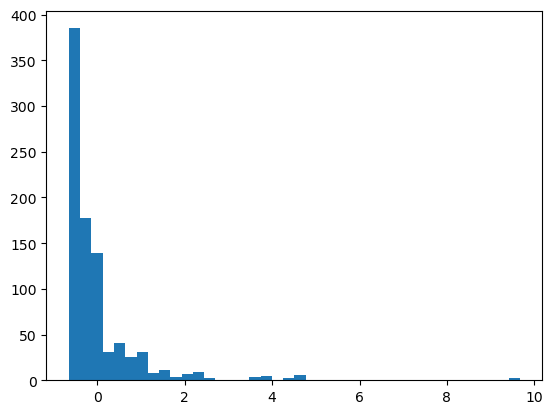

In [55]:
plt.hist(df_scaled[:,3],bins=40)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

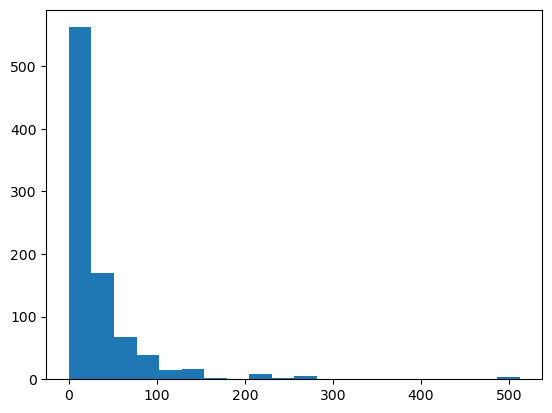

In [56]:
plt.hist(df['Fare'],bins=20)

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
minmax = MinMaxScaler()
df_minmax = pd.DataFrame(minmax.fit_transform(df),columns=df.columns)

In [59]:
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

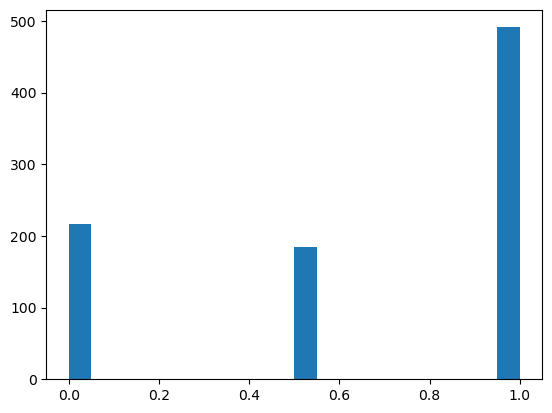

In [60]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

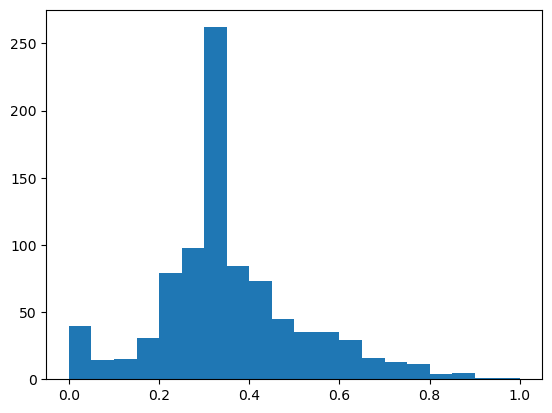

In [61]:
plt.hist(df_minmax['Age'],bins=20)

In [62]:
plt.hist(plt.hist(df_minma['Fare'],bins=20)

SyntaxError: unexpected EOF while parsing (1877928352.py, line 1)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

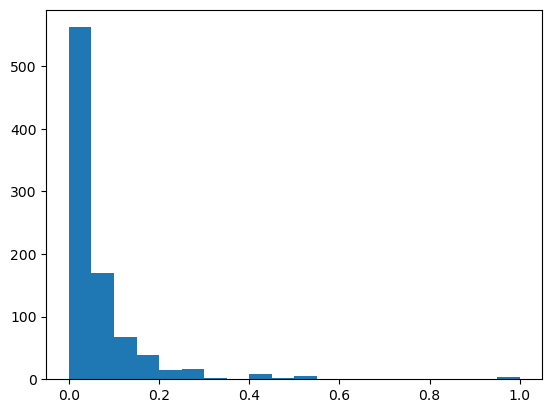

In [64]:
plt.hist(df_minmax['Fare'],bins=20)

In [65]:
from sklearn.preprocessing import RobustScaler

In [66]:
robust = RobustScaler()

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

In [70]:
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


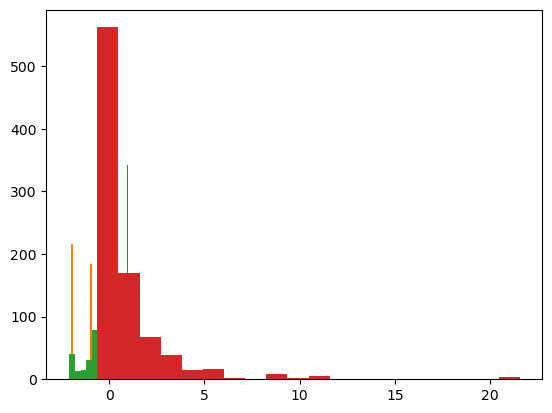

In [74]:
for i in df_robust_scaler.columns:
    plt.hist(df_robust_scaler[i],bins=20)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

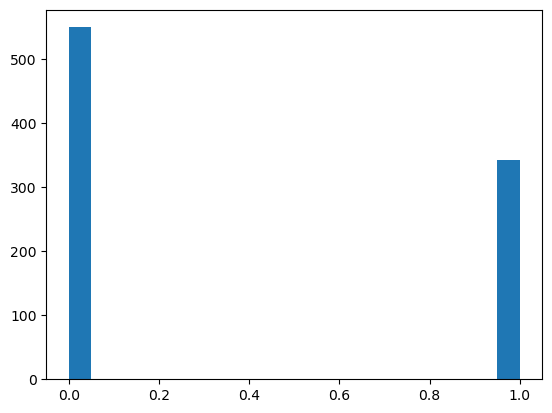

In [75]:
plt.hist(df_robust_scaler['Survived'],bins=20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 20 artists>)

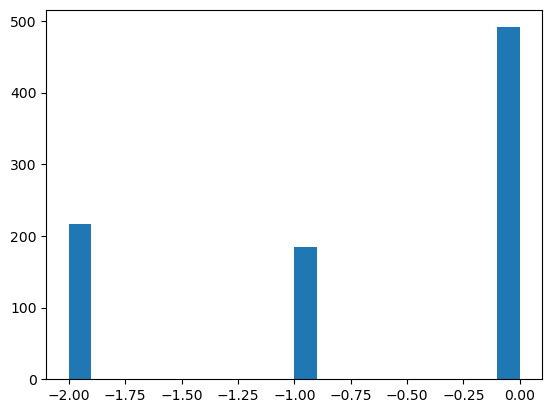

In [76]:
plt.hist(df_robust_scaler['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

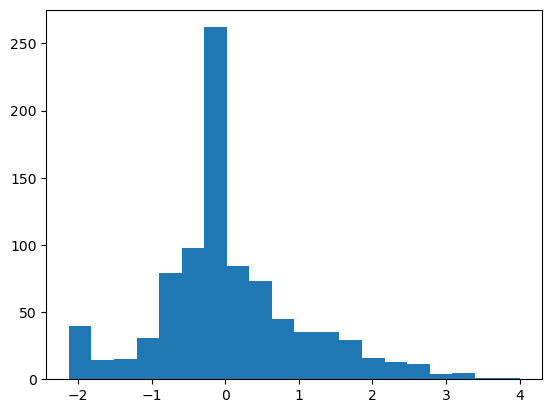

In [77]:
plt.hist(df_robust_scaler['Age'],bins=20)

In [78]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [79]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

In [80]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [81]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [82]:
import scipy.stats as stat
import pylab 

In [84]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    
    

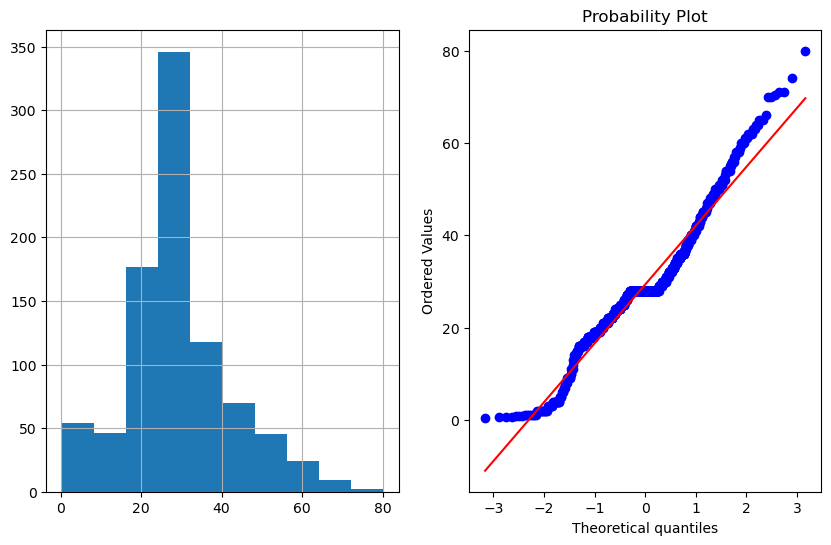

In [85]:
plot_data(df,'Age')

In [86]:
import numpy as np

In [87]:
df['Age_log'] = np.log(df['Age'])

In [88]:
df['Age_log']

0      3.091042
1      3.637586
2      3.258097
3      3.555348
4      3.555348
         ...   
886    3.295837
887    2.944439
888    3.332205
889    3.258097
890    3.465736
Name: Age_log, Length: 891, dtype: float64

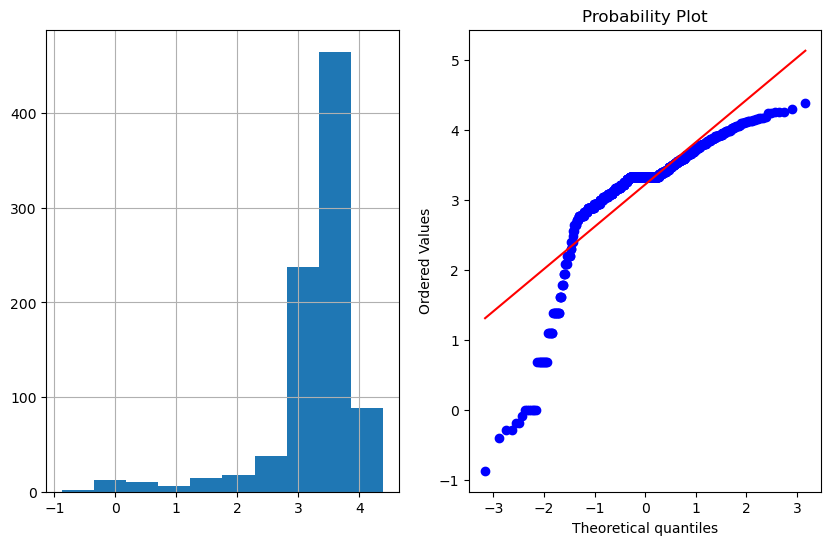

In [89]:
plot_data(df,'Age_log')

In [90]:
df['Age_reciprocal'] = 1/df.Age

In [91]:
df['Age_reciprocal'] 

0      0.045455
1      0.026316
2      0.038462
3      0.028571
4      0.028571
         ...   
886    0.037037
887    0.052632
888    0.035714
889    0.038462
890    0.031250
Name: Age_reciprocal, Length: 891, dtype: float64

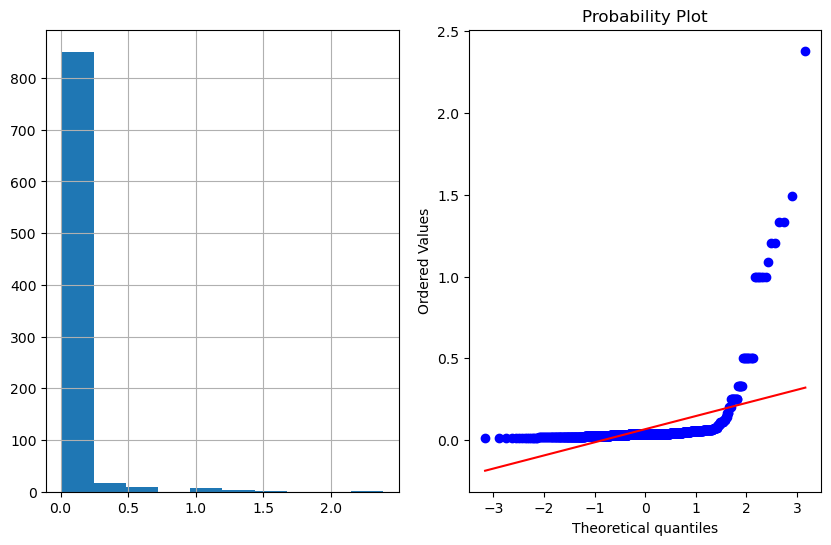

In [92]:
plot_data(df,'Age_reciprocal')

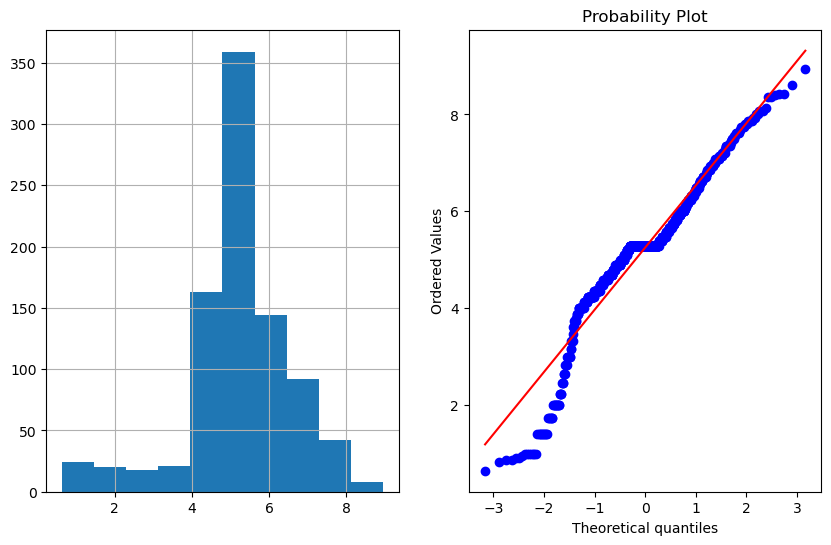

In [93]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

In [94]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [95]:
parameters

0.7964531473656952

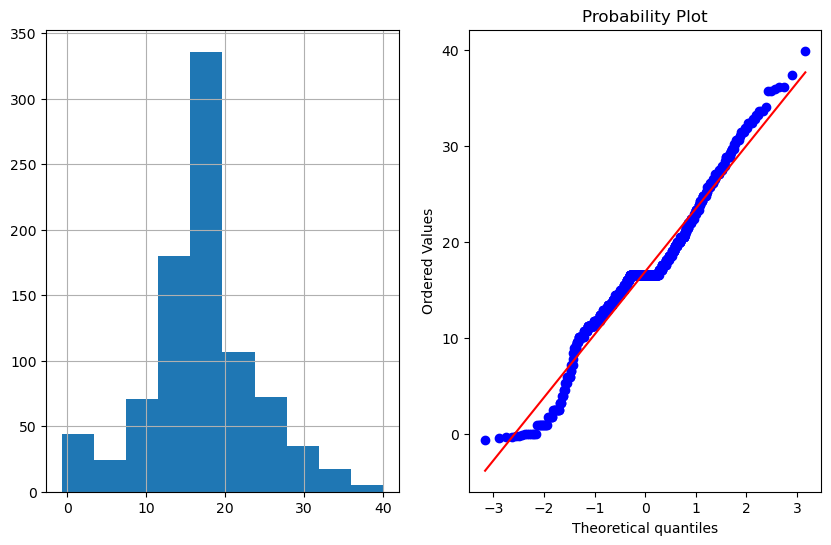

In [96]:
plot_data(df,'Age_Boxcox')

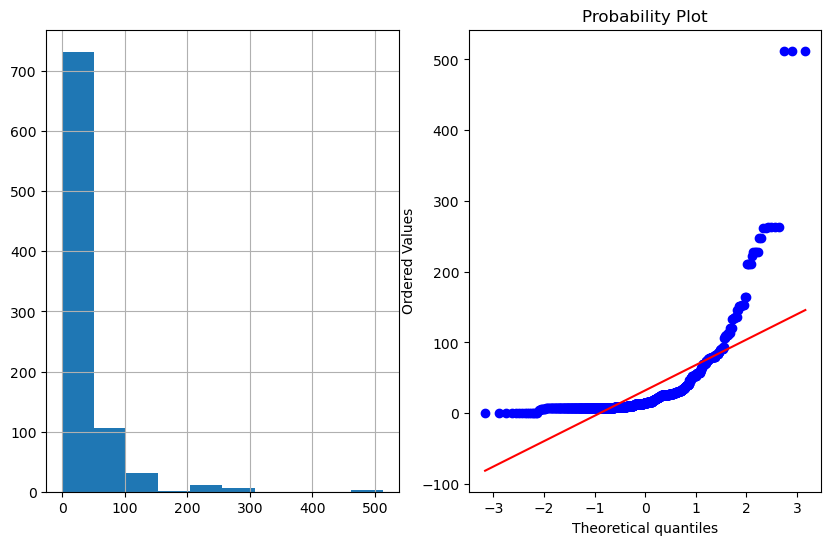

In [97]:
plot_data(df,'Fare')